# Proyek Analisis Data Dengan Python:
- **Nama:** Diaz Darsya Rizqullah
- **Email:** m322b4ky1117@bangkit.academy
- **ID Dicoding:** diazdarsya

## Menentukan Pertanyaan

1. bagaimana pola jumlah bikeshare dalam beberapa tahun terakhir
2. Bagaimana pola penggunaan bikeshare berdasarkan waktu?
3. Pada musim apa aktivitas bikeshare tertinggi?
4. Apakah cuaca mempengaruhi jumlah bikeshare?
5. Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat bikeshare sedang tinggi? (Menggunakan teknik analisis lanjutan yaitu clustering)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import Semua Packages yang dipakai

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import datetime
import calendar

def print_library_versions():
    print("Pandas version:", pd.__version__)
    print("NumPy version:", np.__version__)
    print("Seaborn version:", sns.__version__)
    print("Matplotlib version:", plt.matplotlib.__version__)
    print("SciPy version:", scipy.__version__)

print_library_versions()

Pandas version: 2.1.4
NumPy version: 1.26.4
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
SciPy version: 1.13.1


## Data Wrangling

### Gathering Data

In [3]:
haridiaz = pd.read_csv("/content/day.csv" , sep=';')
jamdiaz = pd.read_csv("/content/hour.csv")

In [5]:
haridiaz.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
jamdiaz.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

### Data Type

In [10]:
print('info dataframe day:')
print (haridiaz.info())
print('\ninfo dataframe hour:')
print(jamdiaz.info())

info dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

info dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeInd

### missing value

In [11]:
haridiaz.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
jamdiaz.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### data duplikat

In [13]:
print('Dataframe day:', haridiaz.duplicated().sum())
print("Dataframe hour:", jamdiaz.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


### statistik deskriptif

In [14]:
print('statistik deskriptif day:')
print (haridiaz.describe())
print('\nstatistik deskriptif hour:')
print(jamdiaz.describe())

statistik deskriptif day:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
s

- Jumlah data yang ada adalah 731 entri.
- Musim paling umum yakni Musim panas (season 2).
- Tahun yang dominan adalah 2012 (yr = 1).
- Juli adalah bulan yang paling sering muncul (mnth 7).
- Hanya 2.87% dari hari total adalah hari libur.
- Hari kerja adalah mayoritas (sekitar 68.40%).
- Cuaca rata-rata umumnya baik (weathersit 1).
- Suhu perasaan rata-rata adalah 0.47 (50°C), dan suhu rata-rata adalah 0.50 (41°C).
- Kelembaban rata-rata adalah sekitar 0.47 (47%).
- Kecepatan angin rata-rata adalah sekitar 0.63 yang merupakan 67% dari maksimal.
- Ada sekitar 848 pengguna casual.
- Ada sekitar 3656 pengguna registered.
- Total rental rata-rata sekitar 4504 per hari.

In [15]:
print('Jumlah kolom dan baris day:')
print (haridiaz.shape)
print('\nJumlah kolom dan baris hour:')
print(jamdiaz.shape)

Jumlah kolom dan baris day:
(731, 16)

Jumlah kolom dan baris hour:
(17379, 17)


### cleaning data

In [17]:
haridiaz['dteday'] = pd.to_datetime(haridiaz['dteday'], format='%d/%m/%Y') # Changed the format to match the date format in the data
jamdiaz['dteday'] = pd.to_datetime(jamdiaz['dteday'], format='%Y-%m-%d') # Changed the format to match the date format in the data

In [18]:
print('info dataframe day:')
print (haridiaz.info())
print('\ninfo dataframe hour:')
print(jamdiaz.info())

info dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: dat

memperbaiki data dari variabel season, weekday, dan month

In [19]:
jamdiaz['weekday'] = jamdiaz['dteday'].dt.day_name()
jamdiaz['mnth'] = jamdiaz['dteday'].dt.month_name()

In [20]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in jamdiaz['season']:
    season = find_season(season)
    season_list.append(season)

jamdiaz['season'] = season_list

In [21]:
jamdiaz['yr'] = jamdiaz['dteday'].dt.year

In [22]:
jamdiaz['temp'] = jamdiaz['temp']*41
jamdiaz['atemp'] = jamdiaz['atemp']*50
jamdiaz['hum'] = jamdiaz['hum']*100
jamdiaz['windspeed'] = jamdiaz['windspeed']*67

In [24]:
jamdiaz

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,December,19,0,Monday,1,2,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Winter,2012,December,20,0,Monday,1,2,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Winter,2012,December,21,0,Monday,1,1,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Winter,2012,December,22,0,Monday,1,1,10.66,13.635,56.0,8.9981,13,48,61


lalu, save data yang sudah dibersihkan kedalam csv baru

In [26]:
jamdiaz.to_csv("dataset_clean.csv", index=False)

# EDA

### analisis univariat

In [28]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
jamdiaz_float =jamdiaz[float_vars]

jamdiaz_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


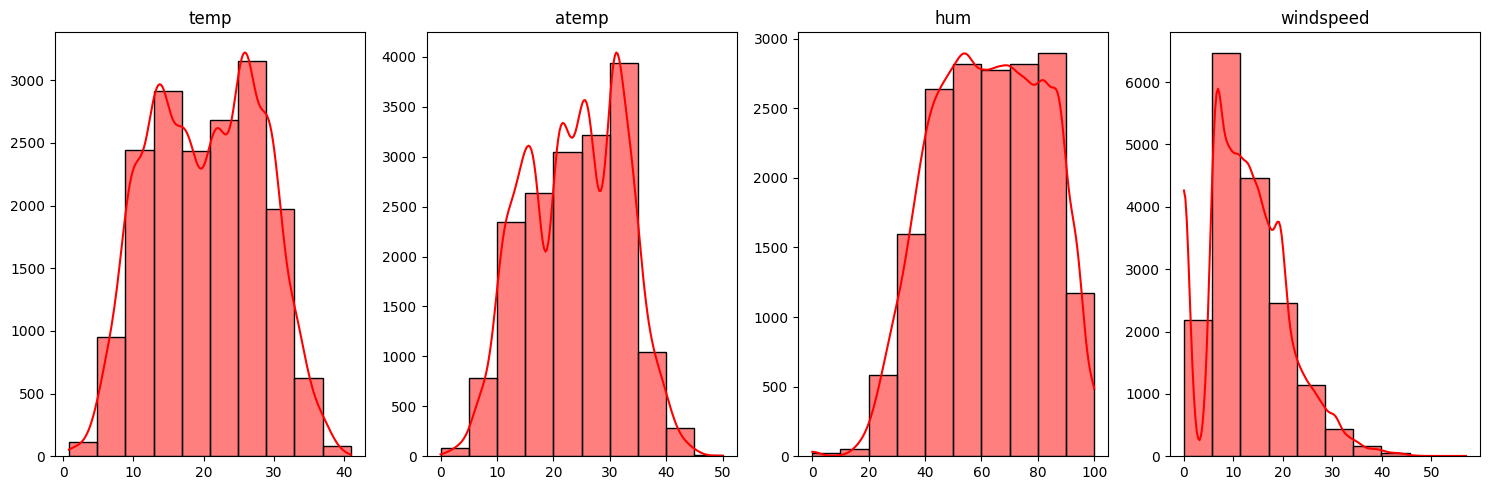

In [30]:
# Histogram
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='red')
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

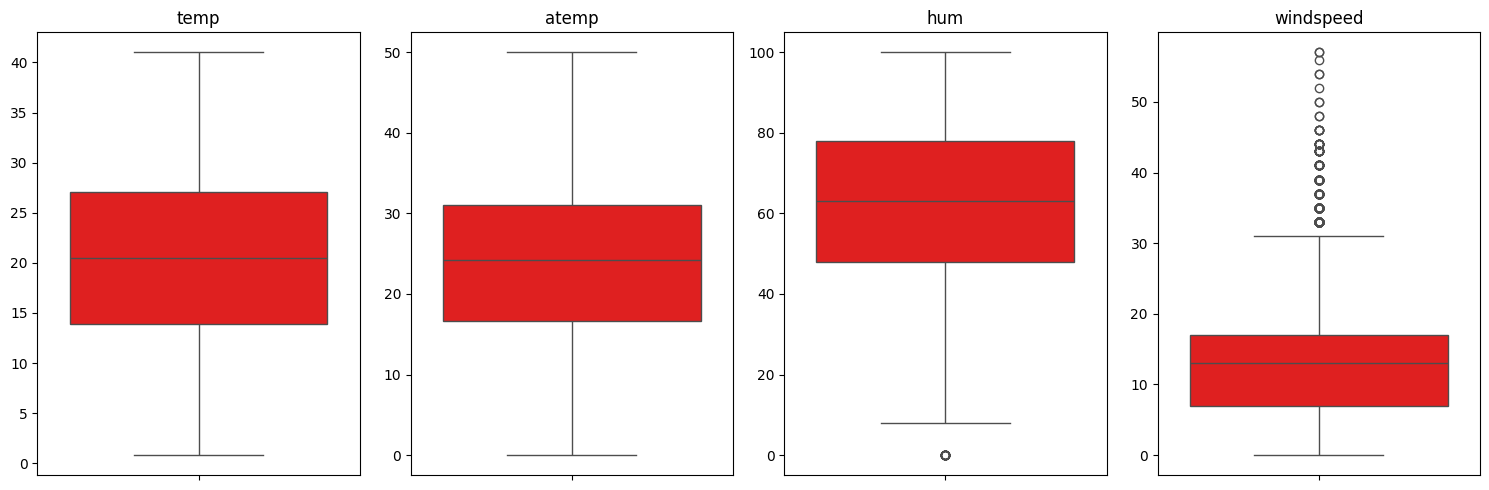

In [31]:
# Boxplot
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

### analisis multivariat


<ipython-input-32-a8994085de77>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[jumlah_registered, jumlah_casual],  palette=["red"])
<ipython-input-32-a8994085de77>:7: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=["Registered", "Casual"], y=[jumlah_registered, jumlah_casual],  palette=["red"])


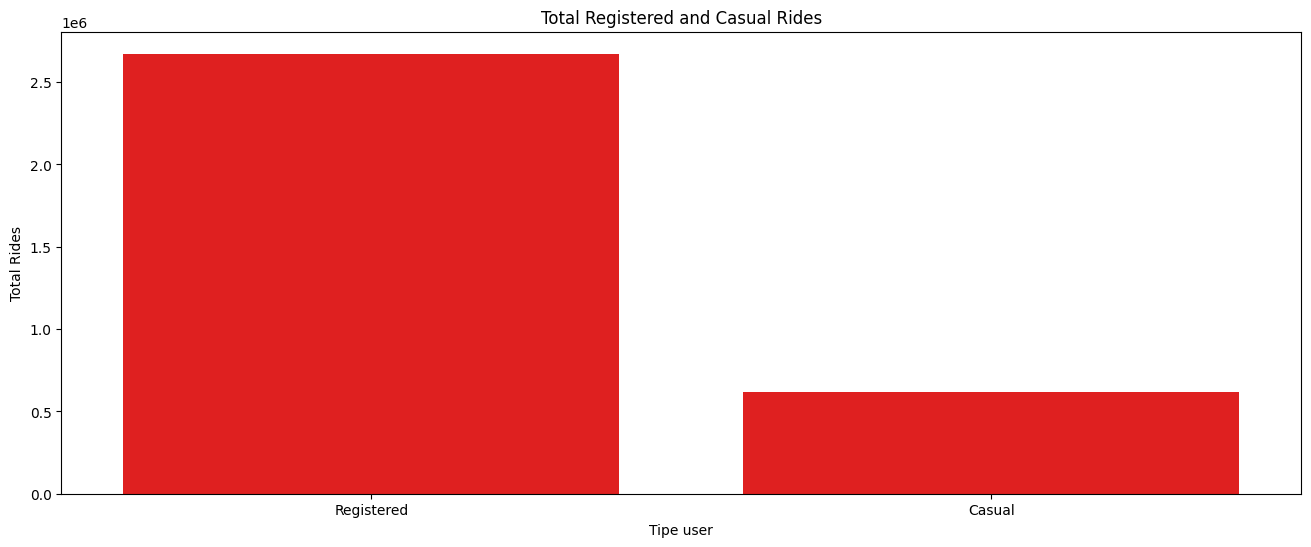

Jumlah dari registered users: 2672662
Jumlah dari casual users: 620017


In [32]:
jumlah_registered = jamdiaz['registered'].sum()
jumlah_casual = jamdiaz['casual'].sum()

plt.figure(figsize=(16,6))

sns.barplot(x=["Registered", "Casual"], y=[jumlah_registered, jumlah_casual],  palette=["red"])

plt.xlabel("Tipe user")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

plt.show()

print(f"Jumlah dari registered users: {jumlah_registered}")
print(f"Jumlah dari casual users: {jumlah_casual}")

Dapat dilihat dari plot diatas bahwa pengguna bikeshare registered lebih besar jika dibandingkan dengan pengguna casual

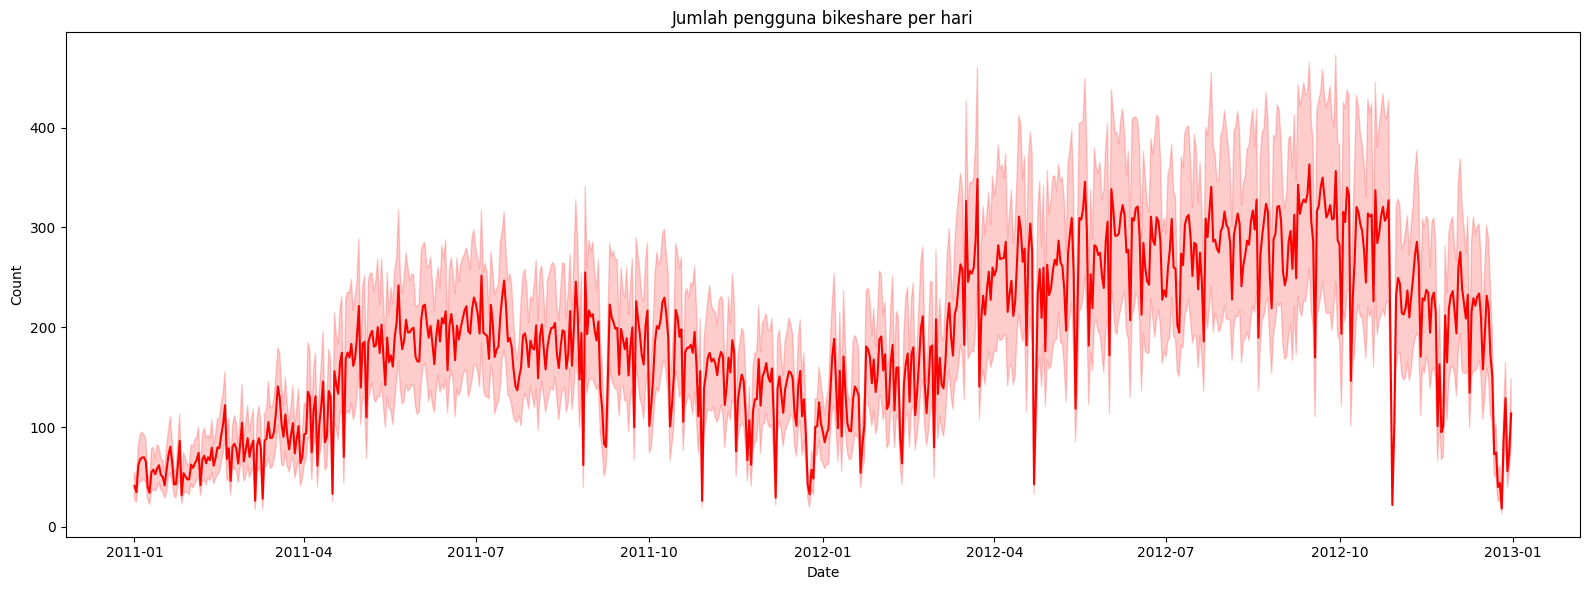

In [34]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=jamdiaz, color='red')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Jumlah pengguna bikeshare per hari")

plt.tight_layout()
plt.show()


Berdasarkan plot diatas dapat dilihat bahwa jumlah perjalanan dimulai dari jumlah yang sedikit setiap awal tahun, lalu mulai menunjukkan peningkatan pada pertengahan tahun dan menurun ketika memasuki akhir tahun. Dapat dilihat juga total pengguna secara visual lebih tinggi pada tahun 2012 jika dibandingkan dengan tahun 2011

### matriks korelasi dan heatmap

In [35]:
jamdiaz.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

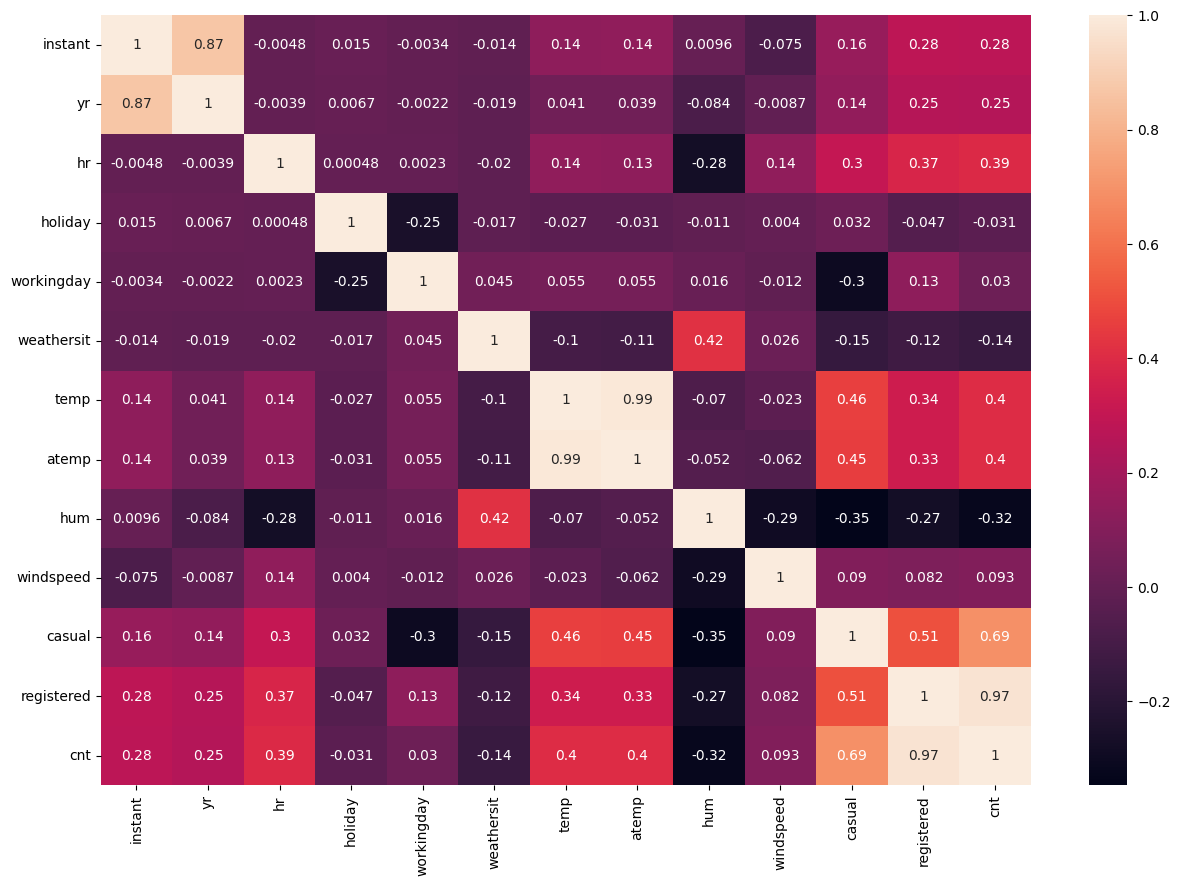

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(jamdiaz.corr(numeric_only=True), annot=True)

Berdasarjan plot diatas dapat dilihat adanya korelasi yang kuat antara variabel casual dan registered dengan variavel cnt

# Menjawab pertanyaan dengan visualization dan Explanatory analysis

### 1. Bagaimana pola jumlah bikeshare dalam beberapa tahun terakhir?

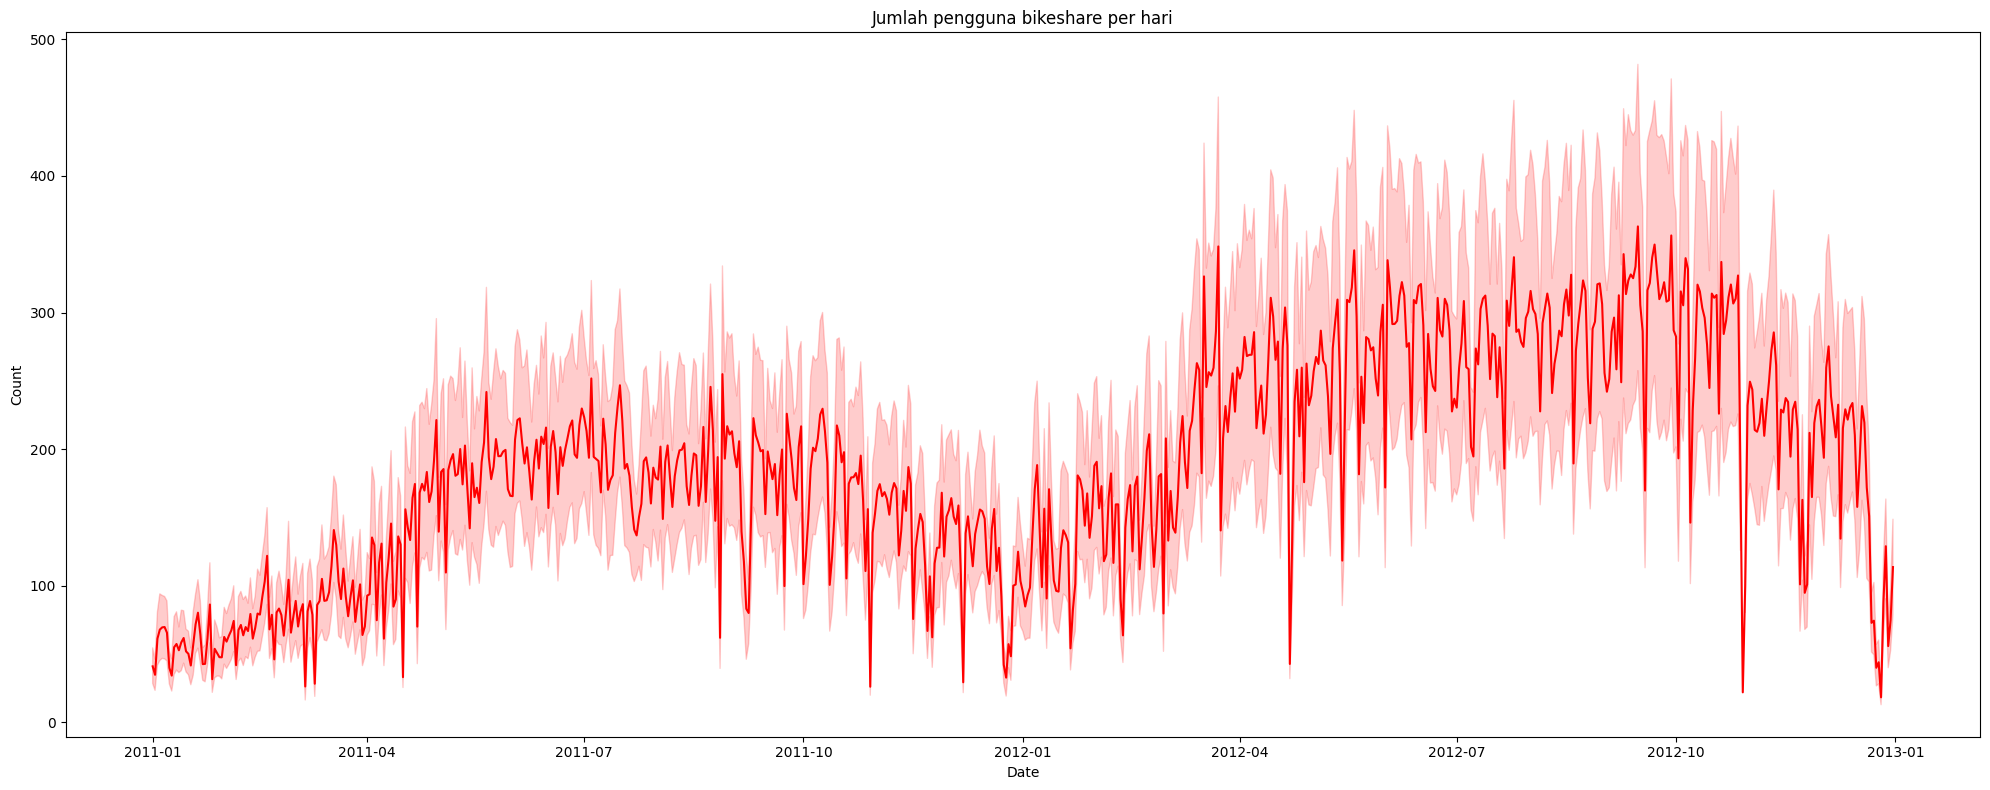

In [39]:
plt.figure(figsize=(20,8))

sns.lineplot(x="dteday", y="cnt", data=jamdiaz, color='red')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Jumlah pengguna bikeshare per hari")

plt.tight_layout()
plt.show()

In [40]:
pengguna_bulanan = jamdiaz.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

pengguna_bulanan.index = pengguna_bulanan.index.strftime('%b-%y')
pengguna_bulanan = pengguna_bulanan.reset_index()
pengguna_bulanan = pengguna_bulanan.rename(columns={'dteday': 'yearmonth'})

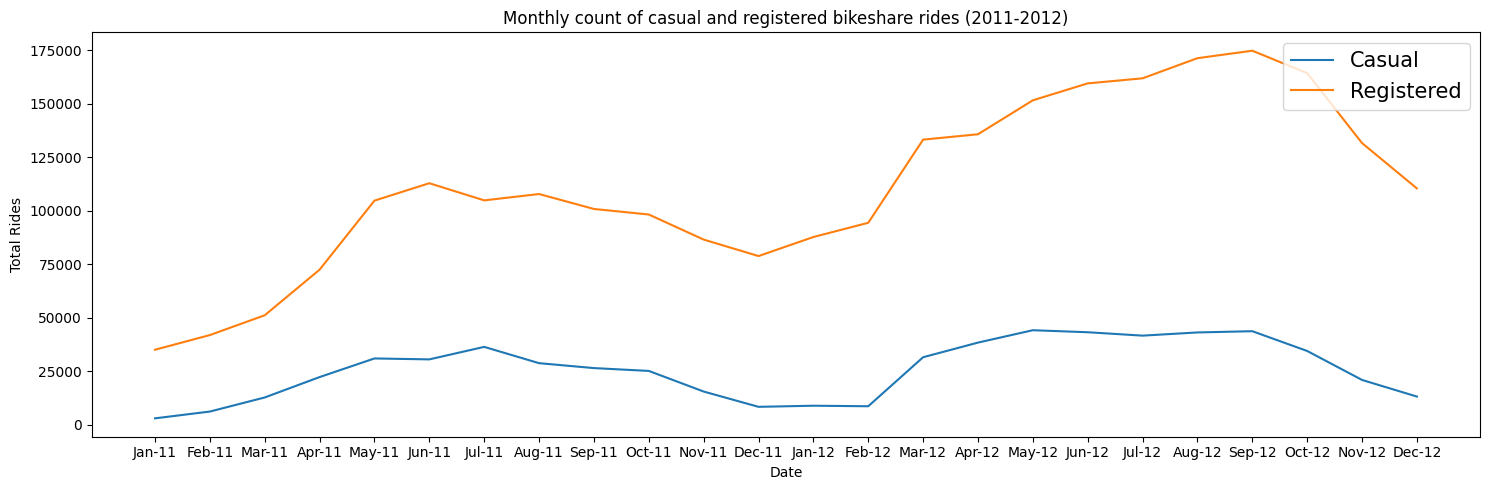

In [41]:
plt.figure(figsize=(15,5))

sns.lineplot(x="yearmonth", y="casual", data=pengguna_bulanan, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=pengguna_bulanan, label='Registered')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

plt.legend(loc='upper right', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

**kesimpulan:**
1. Jumlah bikeshare lebih tinggi pada tahun 2012 dibandingkan tahun 2011.
2. Jumlah aktivitas bikesahre yang registered lebih tinggi daripada yang casual, meskipun keduanya menunjukkan pola yang sama sepanjang tahun.
3. Kita dapat melihat peningkatan jumlah bikeshare pada pertengahan tahun 2011, penurunan pada akhir tahun, dan peningkatan kembali pada pertengahan tahun 2012.

### 2. Bagaimana pola penggunaan bikeshare berdasarkan waktu?

In [42]:
pengguna_jam = jamdiaz.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

pengguna_jam.head()
pengguna_jam = pengguna_jam.reset_index()

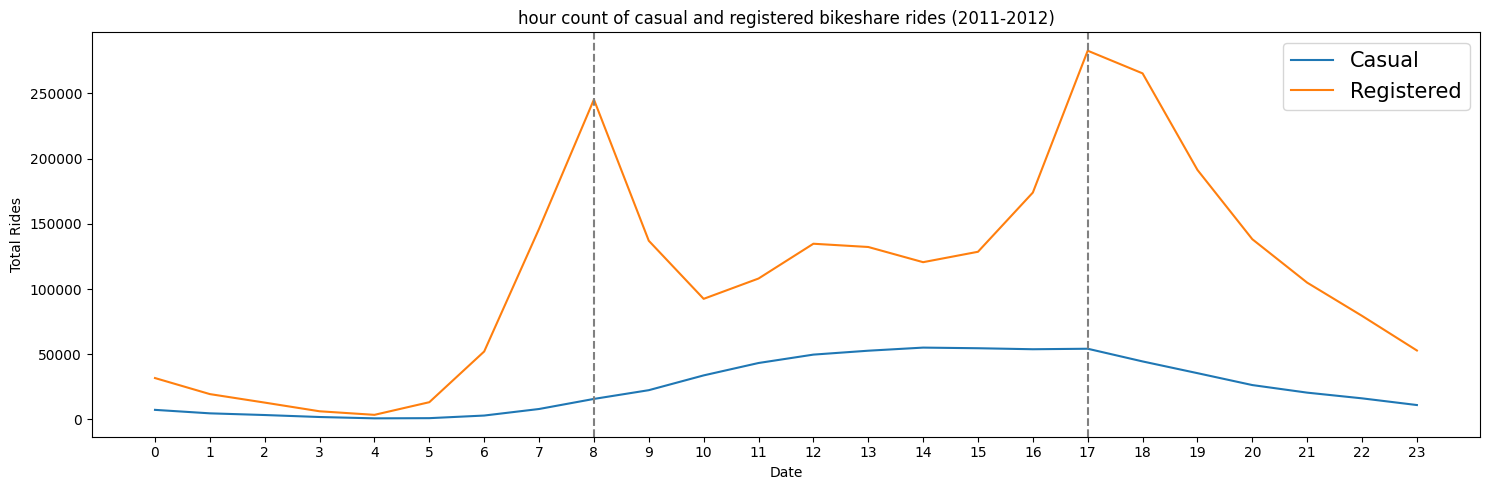

In [45]:
plt.figure(figsize=(15,5))

sns.lineplot(x="hr", y="casual", data=pengguna_jam, label='Casual')
sns.lineplot(x="hr", y="registered", data=pengguna_jam, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("hour count of casual and registered bikeshare rides (2011-2012)")

plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

**kesimpulan:**
1. Bagan di atas menunjukkan perbedaan pola antara bikeshare casual dan registered berdasarkan jam dalam sehari.
2. Bikeshare registered menunjukkan puncaknya antara pukul 08.00 dan 17.00. Mengingat bahwa kedua jam tersebut adalah waktu di mana orang berangkat dan pulang dari pekerjaan mereka, ada kemungkinan bahwa pengguna registered menyewa sepeda tersebut menggunakannya untuk berangkat kerja.
3. Sebaliknya, bikeshare secara casual menunjukkan frekuensi yang lebih tinggi pada siang hari tetapi mulai menurun setelah pukul 17.00



### 3. Pada musim apa aktivitas bikeshare tertinggi?


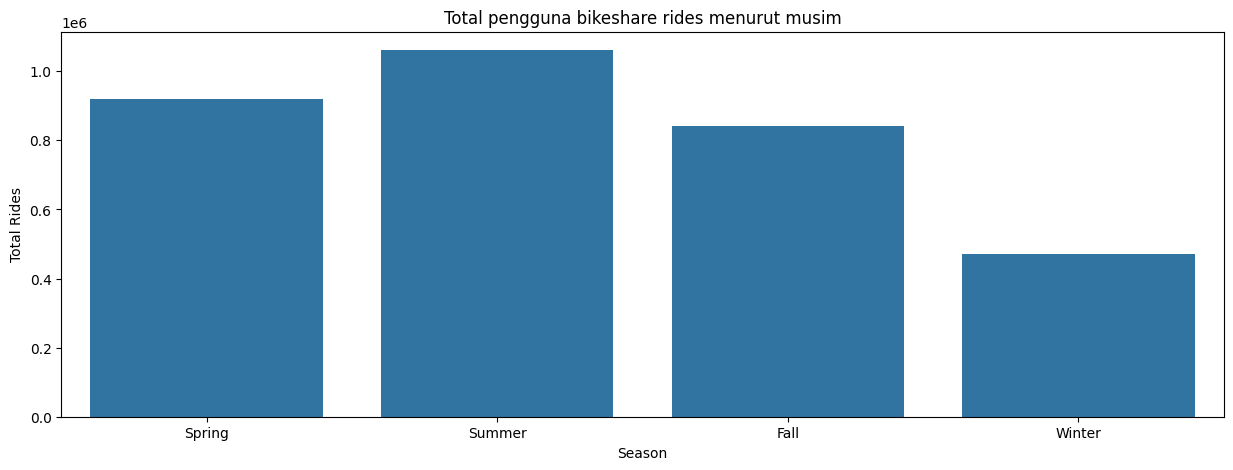

In [47]:
pengguna_menurut_musim = jamdiaz.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
pengguna_menurut_musim = pengguna_menurut_musim.reset_index()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(15,5))

sns.barplot(x="season", y="cnt", data=pengguna_menurut_musim, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total pengguna bikeshare rides menurut musim")

plt.show()

**Kesimpulan:**

Berdasarkan visualisasi diatas dapat diketahui bahwa yang menggunakan bikeshare tertinggi terdapat pada musim summer dan terendah pada musim winter

### 4. Apakah cuaca mempengaruhi jumlah bikeshare?

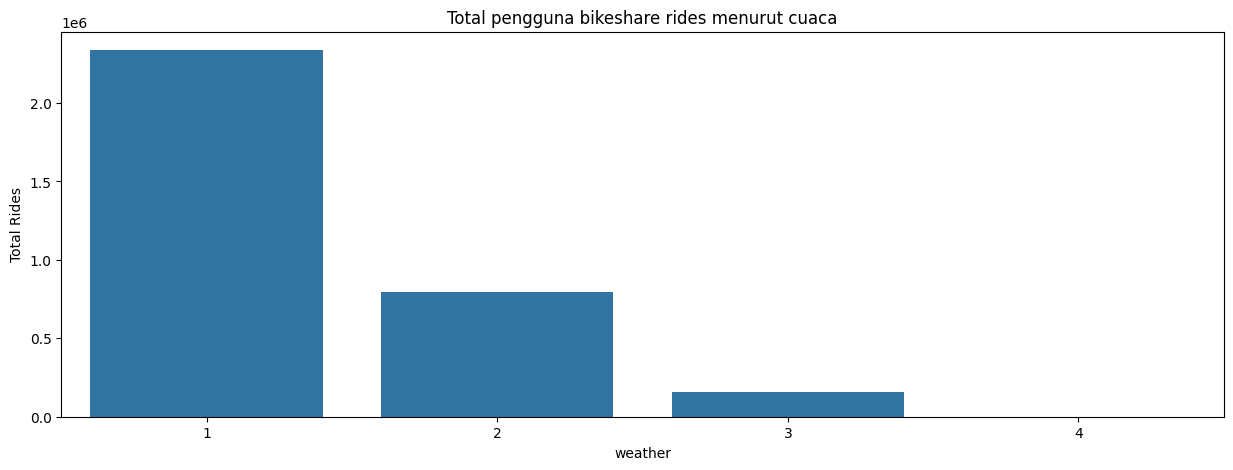

In [50]:
pengguna_menurut_cuaca = jamdiaz.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
pengguna_menurut_cuaca = pengguna_menurut_cuaca.reset_index()
plt.figure(figsize=(15,5))

sns.barplot(x="weathersit", y="cnt", data=pengguna_menurut_cuaca)

plt.xlabel("weather")
plt.ylabel("Total Rides")
plt.title("Total pengguna bikeshare rides menurut cuaca")

plt.show()

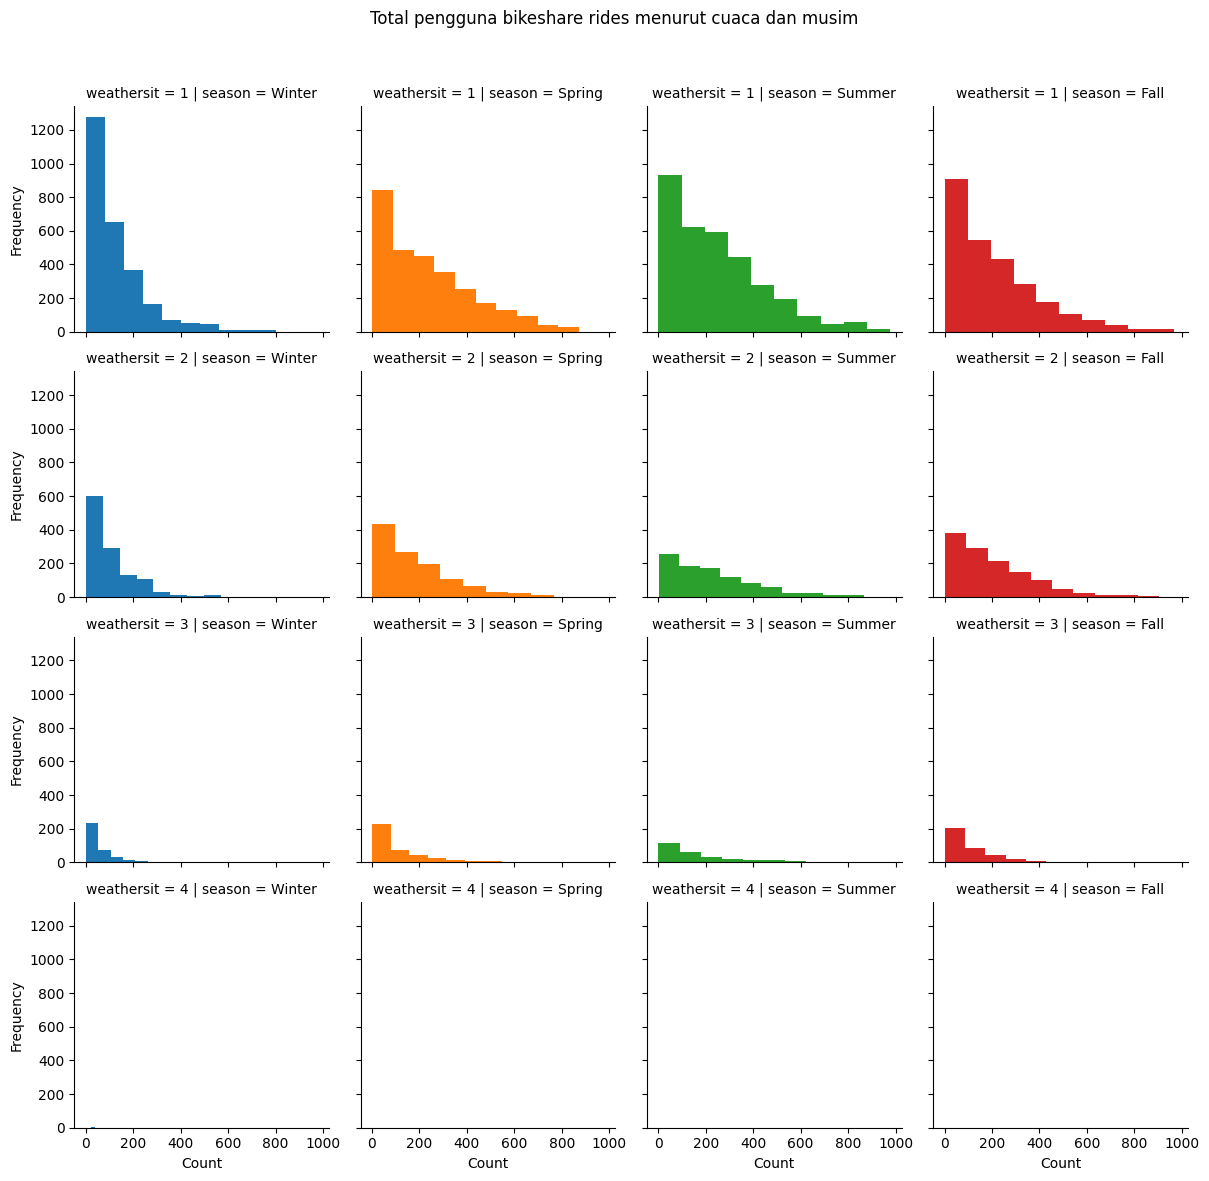

In [52]:
plt.rcParams['figure.figsize'] = [15.0, 15.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=jamdiaz,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total pengguna bikeshare rides menurut cuaca dan musim')

g.set_xlabels('Count')
g.set_ylabels('Frequency')

plt.show()

**kesimpulan:**

Faktor cuaca sebagian besar memengaruhi jumlah pengguna bikeshare. jumlah orang yang berkendara jauh lebih sedikit saat hujan lebat dan badai petir dibandingkan dengan cuaca yang lebih baik. kondisi ini berlaku selama musim apa pun.


### 5. Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat bikeshare sedang tinggi? (Menggunakan teknik analisis lanjutan yaitu clustering)

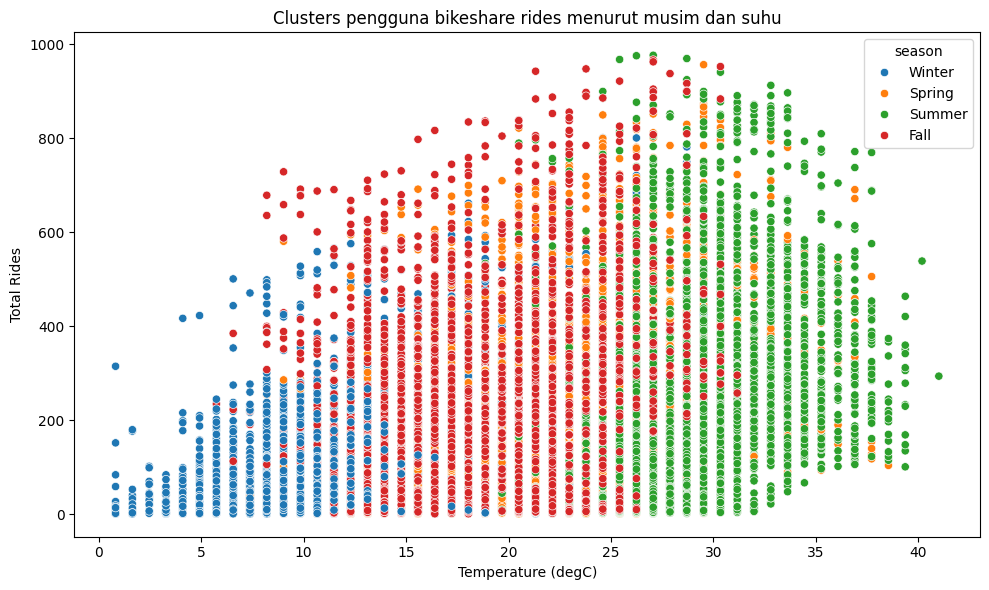

In [53]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=jamdiaz, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters pengguna bikeshare rides menurut musim dan suhu")

# Show the plot
plt.tight_layout()
plt.show()

**kesimpulan**

Pada grafik di atas, ketika suhu lebih rendah, jumlah bikeshare juga lebih rendah. Ini terjadi selama musim winter, sedangkan ketika suhu lebih tinggi, jumlah bikeshare juga meningkat. Namun, tampaknya ketika suhu antara 20 dan 30 derajat Celcius, jumlah bikeshare paling tinggi.


# conclusion

Conclution Pertanyaan 1: bagaimana pola jumlah sewaan sepeda dalam beberapa tahun terakhir?
- Jumlah bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat pada pertengahan tahun dan menurun pada awal dan akhir tahun.

Conclution pertanyaan 2: Bagaimana pola penggunaan bikeshare berdasarkan waktu?
- bikeshare registered menunjukkan puncaknya pada pukul 08.00 dan 17.00. Mengingat kedua jam tersebut adalah waktu orang berangkat dan pulang kerja, ada kemungkinan pengguna registered yang menyewa sepeda dan menggunakan sepeda tersebut untuk berangkat kerja. Sebaliknya, frekuensi yang menyewa sepeda casual menunjukkan frekuensi yang lebih tinggi pada siang hari, kemudian mulai menurun setelah pukul 17.00.

Conclution pertanyaan 3: Pada musim apa aktivitas bikeshare tertinggi?
- Jumlah bikeshare tertinggi terjadi pada musim panas dan terendah pada musim dingin.

Conclution pertanyaan 4: Apakah cuaca mempengaruhi jumlah bikeshare?
- ya, Jumlah pengguna yang bikeshare sebagian besar dipengaruhi oleh kondisi cuaca. Jumlah penumpang yang berkendara jauh lebih sedikit saat hujan lebat dan badai petir dibandingkan saat cuaca lebih baik. kondisi ini berlaku untuk semua musim

Conclution pertanyaan 5: Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat bikeshare sedang tinggi? (Menggunakan teknik analisis lanjutan yaitu clustering)
- ya, pada saat suhu lebih rendah jumlah bikeshare juga rendah. Hal ini terjadi selama musim dingin. dan Ketika suhu sedang tinggi, jumlah bikeshare juga meningkat. Hal ini terjadi selama musim panas. jumlah bikeshare yang tertinggi pada cluster musim gugur dan musim panas. yaitu pada suhu antara 20 hingga 30 derajat Celcius.
